In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import acquire as acq
import prepare as prep

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Create a new notebook, random_forests, and work with titanic data to do the following:

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [125]:
titanic = acq.get_titanic_data()
titanic = prep.prep_titanic(titanic)
train_titanic, validate_titanic, test_titanic = prep.split_data(titanic, 'survived')

In [126]:
train_titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
passenger_id,,,,,,,,,,,
455,1,3,male,0,0,7.8958,C,1,1,0,0
380,1,1,female,0,0,227.5250,C,1,0,0,0
492,0,1,male,0,0,30.5000,S,1,1,0,1
55,1,1,male,0,0,35.5000,S,1,1,0,1
243,0,3,male,0,0,7.1250,S,1,1,0,1


In [127]:
trees = RandomForestClassifier(random_state=123,
                              min_samples_leaf=1,
                              max_depth=10)

- Evaluate your results using the model score, confusion matrix, and classification report.

In [128]:
X_train = train_titanic.select_dtypes(exclude='object').iloc[:,1:]
y_train = train_titanic.survived

In [129]:
X_validate = validate_titanic.select_dtypes(exclude='object').iloc[:,1:]
y_validate = validate_titanic.survived

In [130]:
X_test = test_titanic.select_dtypes(exclude='object').iloc[:,1:]
y_test = test_titanic.survived

In [131]:
trees.fit(X_train, y_train) # in-sample score of model
trees.score(X_train, y_train)

0.9438202247191011

In [140]:
y_pred = trees.predict(X_train)

conf = confusion_matrix(y_train, y_pred)

pd.DataFrame(confusion_matrix(y_train, y_pred),
            index = ['not_survived_actual', 'survived_actual'],
            columns = ['not_survived_predict', 'survived_predict']
            ) # To show TP, TN, FP, FN

,not_survived_predict,survived_predict
not_survived_actual,324,5
survived_actual,25,180


In [141]:
TN, FP, FN, TP = conf.ravel() # Storing these for future question

In [133]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



In [142]:
cr = classification_report(y_train, y_pred, target_names = ['not_survived','survived'], output_dict=True)
cr
# To show accuracy, precision, recall, f1-score, support

{'not_survived': {'precision': 0.9283667621776505,
  'recall': 0.9848024316109423,
  'f1-score': 0.9557522123893806,
  'support': 329},
 'survived': {'precision': 0.972972972972973,
  'recall': 0.8780487804878049,
  'f1-score': 0.923076923076923,
  'support': 205},
 'accuracy': 0.9438202247191011,
 'macro avg': {'precision': 0.9506698675753118,
  'recall': 0.9314256060493735,
  'f1-score': 0.9394145677331518,
  'support': 534},
 'weighted avg': {'precision': 0.9454908693181769,
  'recall': 0.9438202247191011,
  'f1-score': 0.943208327915497,
  'support': 534}}

0.9438202247191011

- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [147]:
all_ = (TN + TP + FN + FP)

print(f'Accuracy of model is {round((cr["accuracy"]),3)}')
print(f'TP rate of model is {round((TP / all_),3)}')
print(f'FP rate of model is {round((FP / all_),3)}')
print(f'TN rate of model is {round((TN / all_),3)}')
print(f'FN rate of model is {round((FN / all_),3)}')
print(f'Precision of model is {round((cr["survived"]["precision"]),3)}')
print(f'Recall of model is {round((cr["survived"]["recall"]),3)}')
print(f'F1-score of model is {round((cr["survived"]["f1-score"]),3)}')
print(f'Support of model is {[TN + FP, TP + FN, all_]}')

Accuracy of model is 0.944
TP rate of model is 0.337
FP rate of model is 0.009
TN rate of model is 0.607
FN rate of model is 0.047
Precision of model is 0.973
Recall of model is 0.878
F1-score of model is 0.923
Support of model is [329, 205, 534]


- Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [35]:
# Only running it on train dataset.

for x in range(1,11):
    trees = RandomForestClassifier(random_state=123,
                              min_samples_leaf=x,
                              max_depth=(11-x))
    X_train = train_titanic.select_dtypes(exclude='object').iloc[:,1:]
    y_train = train_titanic.survived
    trees.fit(X_train, y_train)
    print(f'For min_samples {x} and max_depth {(11-x)}, accuracy is: {trees.score(X_train, y_train)}.')

For min_samples 1 and max_depth 10, accuracy is: 0.9438202247191011.
For min_samples 2 and max_depth 9, accuracy is: 0.8913857677902621.
For min_samples 3 and max_depth 8, accuracy is: 0.8707865168539326.
For min_samples 4 and max_depth 7, accuracy is: 0.8576779026217228.
For min_samples 5 and max_depth 6, accuracy is: 0.8445692883895131.
For min_samples 6 and max_depth 5, accuracy is: 0.8370786516853933.
For min_samples 7 and max_depth 4, accuracy is: 0.8239700374531835.
For min_samples 8 and max_depth 3, accuracy is: 0.8277153558052435.
For min_samples 9 and max_depth 2, accuracy is: 0.7940074906367042.
For min_samples 10 and max_depth 1, accuracy is: 0.7546816479400749.


In [97]:
# Combining values of train dataset along with validate, and getting accuracy scores for each and finding the diff.

scores = pd.DataFrame({})

for x in range(1,11):
    trees = RandomForestClassifier(random_state=123,
                              min_samples_leaf=x,
                              max_depth=(11-x))
    X_train = train_titanic.select_dtypes(exclude='object').iloc[:,1:]
    y_train = train_titanic.survived
    trees.fit(X_train, y_train)
    train_score = trees.score(X_train, y_train)
    X_validate = validate_titanic.select_dtypes(exclude='object').iloc[:,1:]
    y_validate = validate_titanic.survived
    validate_score = trees.score(X_validate, y_validate)
    min_sample = x
    max_depth = (11-x)
    score = pd.DataFrame({'min_samples': [min_sample],
             'max_depth': [max_depth],
             'train_score': [round(train_score, 3)],
             'validate_score': [round(validate_score, 3)],
             'score_diff': [(round((train_score - validate_score), 3))]})
    scores = pd.concat([scores, score])

scores = scores.reset_index(drop=True)
scores
    

,min_samples,max_depth,train_score,validate_score,score_diff
0,1,10,0.944,0.758,0.185
1,2,9,0.891,0.787,0.105
2,3,8,0.871,0.787,0.084
3,4,7,0.858,0.792,0.066
4,5,6,0.845,0.792,0.052
5,6,5,0.837,0.809,0.028
6,7,4,0.824,0.798,0.026
7,8,3,0.828,0.787,0.041
8,9,2,0.794,0.787,0.007
9,10,1,0.755,0.764,-0.009


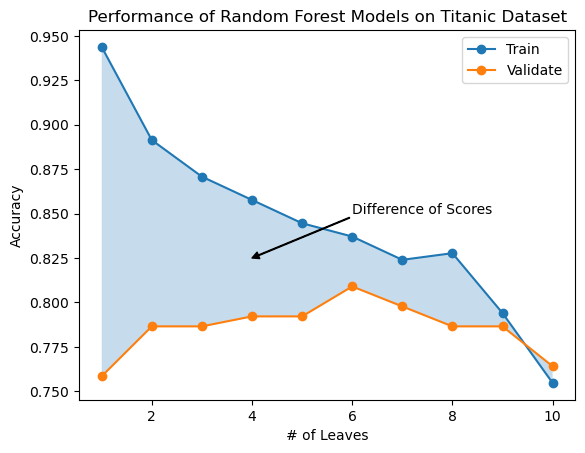

In [94]:
# Do a plot to visually see area where difference between two is minimal while accuracy remains high.

plt.plot(scores.min_samples, scores.train_score, label="Train", marker='o')
plt.plot(scores.min_samples, scores.validate_score, label='Validate', marker = 'o')
plt.title('Performance of Random Forest Models on Titanic Dataset')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('# of Leaves')
plt.annotate('Difference of Scores', xy=(4, 0.825), xytext=(6, 0.85), 
             arrowprops=dict(facecolor='black', width = .5, headwidth = 5, headlength = 5))
plt.fill_between(x=scores.min_samples, y1=scores.validate_score, y2=scores.train_score, alpha=0.25)
plt.show()

- What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The one that performed the best on the in-sample data was # of leaves = 1 with max_depth = 10, probably because it was able to ask so many questions per decision tree, which leads to overfit of data. However, looking at the overall combination of leaves vs. depth, the best model to choose from would have hyperparameters of leaves = 6 or 7 and depth = 5 or 4, respectively.

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

See above response for answer.